In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [45]:
df=pd.read_csv('0100_mig_features_phaseproper.csv',delimiter=",")
df.head()

,PMF,cav1,cav2,cav3,cav4,rmsd,energyself,energywat
0,LOW,65.0,37.00,126.22,28.0,0.883270,-274.893276,-5086.63972
1,LOW,62.0,49.00,126.22,66.0,0.865011,-267.074545,-5072.79996
2,LOW,55.0,35.00,126.22,63.0,0.918933,-230.335208,-5064.36649
3,LOW,75.0,33.00,20.00,78.0,0.942097,-248.987999,-5114.73374
4,LOW,111.0,48.96,126.22,69.0,0.911860,-254.592137,-5105.22737


In [46]:
df['PMF'].nunique()

3

In [47]:
y = df[['PMF']]
x = df[['cav1','cav2','cav3','cav4','rmsd','energyself','energywat']]

In [48]:
x['cav1']=(df['cav1']-df['cav1'].mean())/df['cav1'].std().round(4)
x['cav2']=(df['cav2']-df['cav2'].mean())/df['cav2'].std().round(4)
x['cav3']=(df['cav3']-df['cav3'].mean())/df['cav3'].std().round(4)
x['cav4']=(df['cav4']-df['cav4'].mean())/df['cav4'].std().round(4)
x['rmsd']=((df['rmsd']-df['rmsd'].mean())/df['rmsd'].std()).round(3)
x['energyself']=(df['energyself']-df['energyself'].mean())/df['energyself'].std().round(4)
x['energywat']=(df['energywat']-df['energywat'].mean())/df['energywat'].std().round(4)

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [49]:
x.head()

,cav1,cav2,cav3,cav4,rmsd,energyself,energywat
0,-0.328885,-0.629237,0.006953,-1.478068,-0.381,-2.052745,1.057189
1,-0.459059,0.001085,0.006953,-0.015162,-0.713,-1.871898,1.238112
2,-0.762798,-0.734290,0.006953,-0.130655,0.267,-1.022117,1.348360
3,0.105028,-0.839344,-2.823466,0.446808,0.688,-1.453556,0.689925
4,1.667114,-0.001016,0.006953,0.100330,0.138,-1.583180,0.814199


In [50]:
enc=preprocessing.LabelEncoder()
y['PMF'] = enc.fit_transform(y['PMF'])
x['cav1'] = enc.fit_transform(x['cav1'])
x['cav2'] = enc.fit_transform(x['cav2'])
x['cav3'] = enc.fit_transform(x['cav3'])
x['cav4'] = enc.fit_transform(x['cav4'])
x['rmsd'] = enc.fit_transform(x['rmsd'])
x['energyself'] = enc.fit_transform(x['energyself'])
x['energywat'] = enc.fit_transform(x['energywat'])

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [51]:
x.head()

,cav1,cav2,cav3,cav4,rmsd,energyself,energywat
0,47,19,108,10,1480,173,8957
1,44,32,108,48,1161,295,9406
2,37,17,108,45,2124,1554,9610
3,58,15,1,61,2537,717,7794
4,94,31,108,52,1995,559,8213


In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

In [53]:
#Train and fit Logistic Regression model.
LoRmod=LogisticRegression(max_iter=10000)
LoRmod.fit(X_train,y_train)
#Score LR training
LoRmod.score(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4930952380952381

In [54]:
#Predict from manufactured test and score
LoRpred= LoRmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,LoRpred)*100)
print('F1 score:', f1_score(y_test, LoRpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, LoRpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, LoRpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, LoRpred))
print('Classification report:', classification_report(y_test, LoRpred))

Accuracy score: 48.66666666666667
F1 score: 31.776840900345015
Recall score: 37.20734752341549
Precision score: 44.32852481234376
Confusion matrix: [[ 31  63 472]
 [ 14  77 448]
 [ 26  55 914]]
Classification report:               precision    recall  f1-score   support

           0       0.44      0.05      0.10       566
           1       0.39      0.14      0.21       539
           2       0.50      0.92      0.65       995

    accuracy                           0.49      2100
   macro avg       0.44      0.37      0.32      2100
weighted avg       0.46      0.49      0.39      2100



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [55]:
k_list=[]
for i in range(1,20):
  classifier=KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train,y_train)
  k_list.append(classifier.score(X_test,y_test))

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

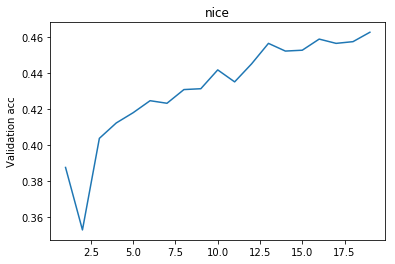

In [56]:
plt.plot(range(1,20),k_list)
plt.ylabel('Validation acc')
plt.title('nice')
plt.show()

In [57]:
KNNmod=KNeighborsClassifier(n_neighbors=13)
KNNmod.fit(X_train,y_train)
#Score RF fit.
KNNmod.score(X_train, y_train)

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.5516666666666666

In [58]:
#Predict from manufactured test and score
KNNpred = KNNmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,KNNpred)*100)
print('F1 score:', f1_score(y_test, KNNpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, KNNpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, KNNpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, KNNpred))
print('Classification report:', classification_report(y_test, KNNpred))

Accuracy score: 45.666666666666664
F1 score: 40.31642291477296
Recall score: 40.361573585974234
Precision score: 41.92480813682257
Confusion matrix: [[139  89 338]
 [ 77 166 296]
 [179 162 654]]
Classification report:               precision    recall  f1-score   support

           0       0.35      0.25      0.29       566
           1       0.40      0.31      0.35       539
           2       0.51      0.66      0.57       995

    accuracy                           0.46      2100
   macro avg       0.42      0.40      0.40      2100
weighted avg       0.44      0.46      0.44      2100



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [19]:
#SVCmod=SVC(kernel='rbf',gamma=0.1)
gamma_list=[]
for i in range(1,10):
  classifier=SVC(kernel='rbf',gamma=(float(i)/10))
  classifier.fit(X_train,y_train)
  gamma_list.append(classifier.score(X_test,y_test))
print(gamma_list)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.4023529411764706, 0.4023529411764706, 0.4023529411764706, 0.4023529411764706, 0.4023529411764706, 0.4023529411764706, 0.4023529411764706, 0.4023529411764706, 0.4023529411764706]


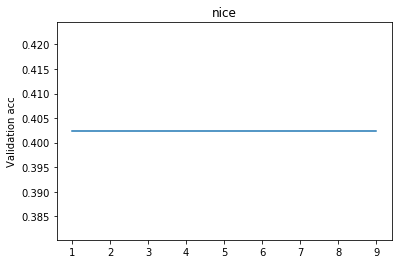

In [20]:
plt.plot(range(1,10),gamma_list)
plt.ylabel('Validation acc')
plt.title('nice')
plt.show()

In [ ]:
SVCmod=SVC(kernel='linear',gamma=0.1)
SVCmod.fit(X_train,y_train)
#Score DT fit.
SVCmod.score(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Predict from manufactured test and score
SVCpred = SVCmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,SVCpred)*100)
print('F1 score:', f1_score(y_test, SVCpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, SVCpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, SVCpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, SVCpred))
print('Classification report:', classification_report(y_test, SVCpred))

In [59]:
DTmod=DecisionTreeClassifier(criterion='gini', random_state = 77,max_depth=10)
DTmod.fit(X_train,y_train)
#Score DT fit.
DTmod.score(X_train, y_train)

0.8086904761904762

In [60]:
#Predict from manufactured test and score
DTpred = DTmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,DTpred)*100)
print('F1 score:', f1_score(y_test, DTpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, DTpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, DTpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, DTpred))
print('Classification report:', classification_report(y_test, DTpred))

Accuracy score: 70.9047619047619
F1 score: 69.93977310970455
Recall score: 69.44795017962471
Precision score: 70.59541295328313
Confusion matrix: [[410  40 116]
 [ 28 323 188]
 [115 124 756]]
Classification report:               precision    recall  f1-score   support

           0       0.74      0.72      0.73       566
           1       0.66      0.60      0.63       539
           2       0.71      0.76      0.74       995

    accuracy                           0.71      2100
   macro avg       0.71      0.69      0.70      2100
weighted avg       0.71      0.71      0.71      2100



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


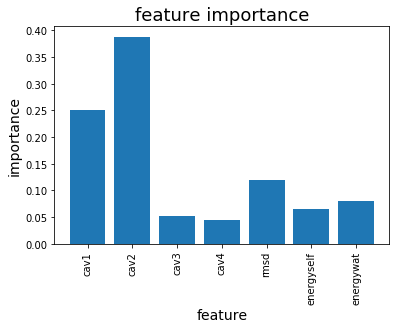

['cav1', 'cav2', 'cav3', 'cav4', 'rmsd', 'energyself', 'energywat']


In [61]:
featurelist=list(df.columns[1:])
plt.bar(range(len(DTmod.feature_importances_)), DTmod.feature_importances_)
plt.xlabel("feature",fontsize=14)
plt.ylabel("importance",fontsize=14)
plt.title("feature importance", fontsize=18)
plt.xticks(range(len(DTmod.feature_importances_)), featurelist,rotation='vertical')
plt.show()
print(featurelist)

In [62]:
#Train and fit Random Forest model.
RFmod=RandomForestClassifier(n_estimators=100,random_state=77)
RFmod.fit(X_train,y_train)
#Score RF fit.
RFmod.score(X_train, y_train)

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

In [63]:
#Predict from manufactured test and score
RFpred = RFmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,RFpred)*100)
print('F1 score:', f1_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, RFpred))
print('Classification report:', classification_report(y_test, RFpred))

Accuracy score: 75.33333333333333
F1 score: 74.68109121137529
Recall score: 74.2859680616359
Precision score: 75.16613452775896
Confusion matrix: [[441  26  99]
 [ 26 356 157]
 [ 91 119 785]]
Classification report:               precision    recall  f1-score   support

           0       0.79      0.78      0.78       566
           1       0.71      0.66      0.68       539
           2       0.75      0.79      0.77       995

    accuracy                           0.75      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.75      0.75      0.75      2100



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


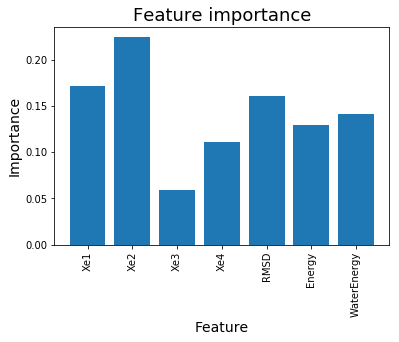

['cav1', 'cav2', 'cav3', 'cav4', 'rmsd', 'energyself', 'energywat']


In [66]:
featurelist=list(df.columns[1:])
plt.bar(range(len(RFmod.feature_importances_)), RFmod.feature_importances_)
plt.xlabel("Feature", fontsize=14, family='Arial')
plt.ylabel("Importance", fontsize=14, family='Arial')
plt.title("Feature importance", fontsize=18, family='Arial')
plt.xticks(range(len(RFmod.feature_importances_)), featurelist,rotation='vertical')
plt.xticks(np.arange(7), ('Xe1', 'Xe2', 'Xe3', 'Xe4', 'RMSD','Energy','WaterEnergy'))
plt.show()
print(featurelist)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


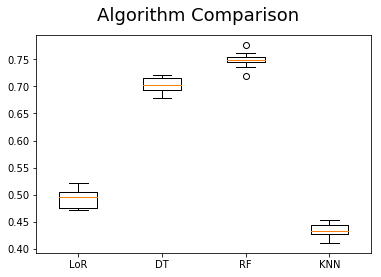

In [67]:
kfold = model_selection.KFold(n_splits=10, random_state=77)
cv_LoR = model_selection.cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, cv=kfold, scoring='accuracy')
cv_DT = model_selection.cross_val_score(DecisionTreeClassifier(criterion='gini', random_state = 77,max_depth=10), X_train, y_train, cv=kfold, scoring='accuracy')
cv_RF = model_selection.cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=kfold, scoring='accuracy')
#cv_SVC = model_selection.cross_val_score(SVC(kernel='rbf',gamma=0.1), X_train, y_train, cv=kfold, scoring='accuracy')
cv_KNN = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train, y_train, cv=kfold, scoring='accuracy')
results=[cv_LoR,cv_DT, cv_RF, cv_KNN]
names=["LoR","DT","RF","KNN"]
fig = plt.figure()
fig.suptitle('Algorithm Comparison',fontsize=18)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()